In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import linalg as la
steps=2000
hbar=1.0
m=1.0
W=1.0
#d=0.5
#cent=-0.0
d=0.5
cent=0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



In [3]:
#potential library returns whole arrays instead of single values
def window(xvec,d,cent):
    return 0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))

def Vpike(A,xvec,d,cent):
    return A*((1-2*(xvec-cent)/d)*window(xvec,d/2,cent+d/4)+(1+2*(xvec-cent)/d)*window(xvec,d/2,cent-d/4))

def Vsq(A,xvec,d,cent):
    return A*window(xvec,d,cent)

def VJar(A1,A2,A3, xvec,cent):
    return A1*(xvec**4 - 0.5*(A2*(xvec)**2*(np.sign( (xvec-cent) )+1)+A3*(xvec)**2*(np.sign( -(xvec-cent) )+1)))

def Vharm(mw2,xvec,cent):
    return 0.5*mw2*(xvec-cent)**2

def Vsqdouble(A1,A3,d1,d3,xvec,cent1,cent2):
    return A1*window(xvec,d1,cent1)+A3*window(xvec,d3,cent2)


Vharm_arr=0.5*(xvec*W)**2
Vpike_arr=300*((1-2*(xvec-cent)/d)*window(xvec,d/2,cent+d/4)+(1+2*(xvec-cent)/d)*window(xvec,d/2,cent-d/4))
Vsq_arr=300.0*window(xvec,d,cent)
VJar_arr=xvec**4 - 0.5*(10*(xvec)**2*(np.sign( (xvec-cent) )+1)+10*(xvec)**2*(np.sign( -(xvec-cent) )+1))

In [4]:
def DiagonHam(V,steps):
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
    valuesF=la.eigh(Hamiltonian)
    return valuesF[0],valuesF[1].T

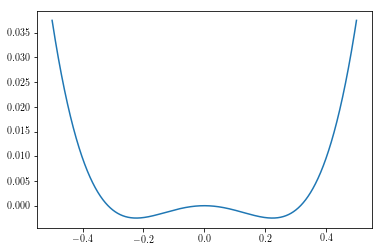

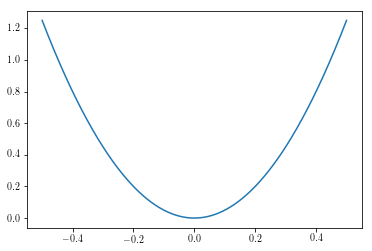

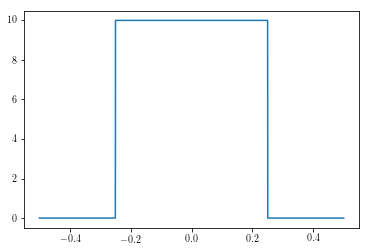

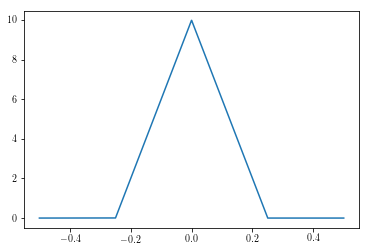

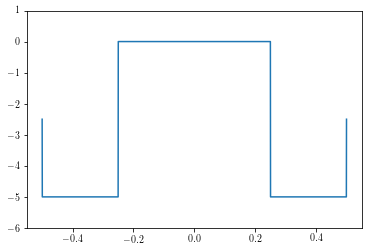

In [5]:
plot( xvec,VJar(1,0.1,0.1, xvec,0))
show()
plot( xvec,Vharm(10,xvec,0))
show()
plot( xvec,Vsq(10,xvec,d,0))
show()
plot( xvec,Vpike(10,xvec,d,0))
show()
plot( xvec,Vsqdouble(-5,-5,d/2,d/2,xvec,-0.5+0.125,0.5-0.125))
ylim([-6,1])
show()

In [8]:
TrayPsi1=zeros([20,2000,300])
Tray1=zeros([20,300])
TrayV1=zeros([2000,300])
TrayX1=zeros([2000,300])


steps=2000
hbar=1.0
m=1.0
W=1.0
#d=0.5
#cent=-0.0
d=0.5
cent=0
W=W/2
A=300


##evolution of the energy levels step 1
frames=100
 # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
    
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1) +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian

for j in range(frames):
    steps=2000
   
    V=Vpike(A*(j/float(frames-1)),xvec,d,0)
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)

    Tray1[:,j]=values[0][0:20]
    TrayPsi1[:,:,j]=(values[1].T)[0:20]
    TrayV1[:,j]=V
    TrayX1[:,j]=xvec



##evolution of the energy levels step 2
frames=100
for j in range(frames):
    steps=2000
    xvec=np.linspace(-W,W+(W+d/2)*(j/float(frames-1)),steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=2000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=Vpike(A,xvec,d,0)
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)

    Tray1[:,j+100]=values[0][0:20]
    TrayPsi1[:,:,j+100]=(values[1].T)[0:20]
    TrayV1[:,j+100]=V
    TrayX1[:,j+100]=xvec



##evolution of the energy levels step 3

frames=100
for j in range(frames):

    # create x-vector from -W to W
    xvec=np.linspace(-W+(W+d/2)*(j/float(frames-1)),W+W+d/2,steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=1000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=Vpike(A,xvec,d,0)  
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    
    Tray1[:,j+200]=values[0][0:20]
    TrayPsi1[:,:,j+200]=(values[1].T)[0:20]
    TrayV1[:,j+200]=V
    TrayX1[:,j+200]=xvec

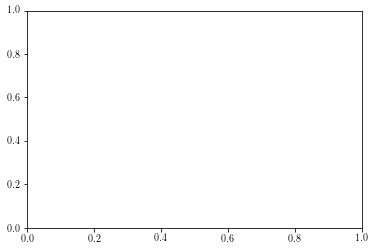

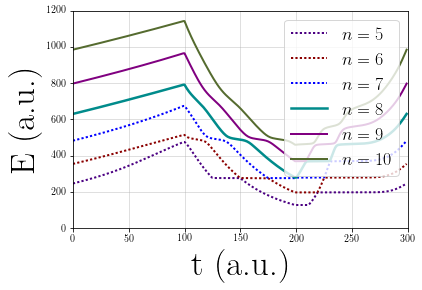

In [9]:
fig, ax = plt.subplots()

rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0,300))
ax.set_ylim((0,1200))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)  

line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
#line01, = ax.plot([], [], lw=2, c='darkblue',ls='-')
#line11, = ax.plot([], [], lw=2, c='g',ls='--')
#line21, = ax.plot([], [], lw=2, c='orange',ls='-.')
#line31, = ax.plot([], [], lw=2.5, c='k',ls=':')
line41, = ax.plot([], [], lw=2, c='indigo',ls=':',label=r'$n=5$')
line51, = ax.plot([], [], lw=2, c='darkred',ls=':',label=r'$n=6$')
line61, = ax.plot([], [], lw=2, c='b',ls=':',label=r'$n=7$')
line71, = ax.plot([], [], lw=2.5, c='darkcyan',ls='-',label=r'$n=8$')
line81, = ax.plot([], [], lw=2, c='purple',ls='-',label=r'$n=9$')
line91, = ax.plot([], [], lw=2, c='darkolivegreen',ls='-',label=r'$n=10$')

tvec1=np.arange(size(Tray1[0,:]))

def init():
    #line01.set_data([], [])
    #line11.set_data([], [])
    #line21.set_data([], [])
    #line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    
    return (line,)
# animation function. This
def plottero():
    '''    
    x01 = tvec1
    y01 = 2*Tray1[0,:]
    line01.set_data(x01, y01)

    
    x11 = tvec1
    y11 = 2*Tray1[1,:]
    line11.set_data(x11, y11)

    
    x21 = tvec1
    y21 = 2*Tray1[2,:]
    line21.set_data(x21, y21)
   
    
    x31 = tvec1
    y31 = 2*Tray1[3,:]
    line31.set_data(x31, y31)

    '''   
    x41 = tvec1
    y41 = 2*Tray1[4,:]
    line41.set_data(x41, y41)
    
    x51 = tvec1
    y51 = 2*Tray1[5,:]
    line51.set_data(x51, y51)
  
    
    x61 = tvec1
    y61 = 2*Tray1[6,:]
    line61.set_data(x61, y61)
    
    x71 = tvec1
    y71 = 2*Tray1[7,:]
    line71.set_data(x71, y71)
    
    
    x81 = tvec1
    y81 = 2*Tray1[8,:]
    line81.set_data(x81, y81)
    
    
    x91 = tvec1
    y91 = 2*Tray1[9,:]
    line91.set_data(x91, y91)
    
    return(line,)
    


plottero()
ylabel("E (a.u.)",size=35)
xlabel("t (a.u.)",size=35)
legend(loc=1)


savefig('EneParraQ.png',dpi=1000)

show()

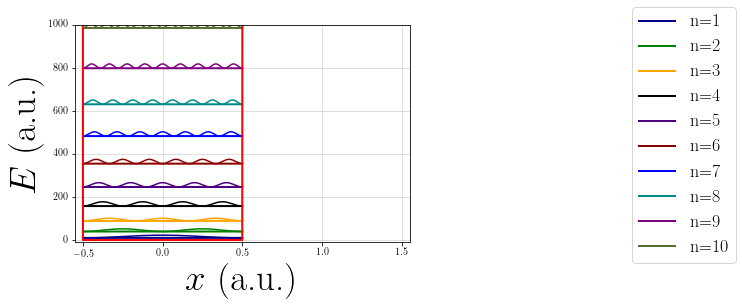

In [10]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-0.55,1.55))
ax.set_ylim((-10,1000))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                


line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue',label='n=1')
line11, = ax.plot([], [], lw=2, c='g',label='n=2')
line21, = ax.plot([], [], lw=2, c='orange',label='n=3')
line31, = ax.plot([], [], lw=2, c='k',label='n=4')
line41, = ax.plot([], [], lw=2, c='indigo',label='n=5')
line51, = ax.plot([], [], lw=2, c='darkred',label='n=6')
line61, = ax.plot([], [], lw=2, c='b',label='n=7')
line71, = ax.plot([], [], lw=2, c='darkcyan',label='n=8')
line81, = ax.plot([], [], lw=2, c='purple',label='n=9')
line91, = ax.plot([], [], lw=2, c='darkolivegreen',label='n=10')


line02, = ax.plot([], [], lw=1.5, c='darkblue')
line12, = ax.plot([], [], lw=1.5, c='g')
line22, = ax.plot([], [], lw=1.5, c='orange')
line32, = ax.plot([], [], lw=1.5, c='k')
line42, = ax.plot([], [], lw=1.5, c='indigo')
line52, = ax.plot([], [], lw=1.5, c='darkred')
line62, = ax.plot([], [], lw=1.5, c='b')
line72, = ax.plot([], [], lw=1.5, c='darkcyan')
line82, = ax.plot([], [], lw=1.5, c='purple')
line92, = ax.plot([], [], lw=1.5, c='darkolivegreen')

line10, = ax.plot([], [], lw=2, c='r')



# initialization function: plot the background of each frame
def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    line02.set_data([], [])
    line12.set_data([], [])
    line22.set_data([], [])
    line32.set_data([], [])
    line42.set_data([], [])
    line52.set_data([], [])
    line62.set_data([], [])
    line72.set_data([], [])
    line82.set_data([], [])
    line92.set_data([], [])
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate(i):
    
    
    
    x01 = TrayX1[:,i]
    y01 = 2*Tray1[0,i]*TrayX1[:,i]/TrayX1[:,i]
    line01.set_data(x01, y01)
    x02 = TrayX1[:,i]
    y02 = TrayPsi1[0,:,i]**2/0.00008+2*Tray1[0,i]
    line02.set_data(x02, y02)
    
    x11 = TrayX1[:,i]
    y11 = 2*Tray1[1,i]*TrayX1[:,i]/TrayX1[:,i]
    line11.set_data(x11, y11)
    x12 = TrayX1[:,i]
    y12 = TrayPsi1[1,:,i]**2/0.00008+2*Tray1[1,i]
    line12.set_data(x12, y12)
    
    x21 = TrayX1[:,i]
    y21 = 2*Tray1[2,i]*TrayX1[:,i]/TrayX1[:,i]
    line21.set_data(x21, y21)
    x22 = TrayX1[:,i]
    y22 = TrayPsi1[2,:,i]**2/0.00008+2*Tray1[2,i]
    line22.set_data(x22, y22)
    
    x31 = TrayX1[:,i]
    y31 = 2*Tray1[3,i]*TrayX1[:,i]/TrayX1[:,i]
    line31.set_data(x31, y31)
    x32 = TrayX1[:,i]
    y32 = TrayPsi1[3,:,i]**2/0.00005+2*Tray1[3,i]
    line32.set_data(x32, y32)
    
    x41 = TrayX1[:,i]
    y41 = 2*Tray1[4,i]*TrayX1[:,i]/TrayX1[:,i]
    line41.set_data(x41, y41)
    x42 = TrayX1[:,i]
    y42 = TrayPsi1[4,:,i]**2/0.00005+2*Tray1[4,i]
    line42.set_data(x42, y42)
    
    x51 = TrayX1[:,i]
    y51 = 2*Tray1[5,i]*TrayX1[:,i]/TrayX1[:,i]
    line51.set_data(x51, y51)
    x52 = TrayX1[:,i]
    y52 = TrayPsi1[5,:,i]**2/0.00005+2*Tray1[5,i]
    line52.set_data(x52, y52)
    
    x61 = TrayX1[:,i]
    y61 = 2*Tray1[6,i]*TrayX1[:,i]/TrayX1[:,i]
    line61.set_data(x61, y61)
    x62 = TrayX1[:,i]
    y62 = TrayPsi1[6,:,i]**2/0.00005+2*Tray1[6,i]
    line62.set_data(x62, y62)
    
    x71 = TrayX1[:,i]
    y71 = 2*Tray1[7,i]*TrayX1[:,i]/TrayX1[:,i]
    line71.set_data(x71, y71)
    x72 = TrayX1[:,i]
    y72 = TrayPsi1[7,:,i]**2/0.00005+2*Tray1[7,i]
    line72.set_data(x72, y72)
    
    x81 = TrayX1[:,i]
    y81 = 2*Tray1[8,i]*TrayX1[:,i]/TrayX1[:,i]
    line81.set_data(x81, y81)
    x82 = TrayX1[:,i]
    y82 = TrayPsi1[8,:,i]**2/0.00005+2*Tray1[8,i]
    line82.set_data(x82, y82)
    
    x91 = TrayX1[:,i]
    y91 = 2*Tray1[9,i]*TrayX1[:,i]/TrayX1[:,i]
    line91.set_data(x91, y91)
    x92 = TrayX1[:,i]
    y92 = TrayPsi1[9,:,i]**2/0.00005+2*Tray1[9,i]
    line92.set_data(x92, y92)
    
    x10 = TrayX1[:,i]
    y10 = 2*TrayV1[:,i]+1000*(np.sign(-TrayX1[:,i]+TrayX1[0,i])+1)+1000*(np.sign(TrayX1[:,i]-TrayX1[-1,i])+1)
    line10.set_data(x10, y10)
    
   
    
    
    return(line,)

animate(0)
ax.set_ylabel("$E$ (a.u.)",size=37)
ax.set_xlabel("$x$ (a.u.)",size=37)
legend(bbox_to_anchor=(1., 1.02, 1., .102),loc=0)
savefig('degenerateParr121.png')

In [11]:
TrayPsi2=zeros([20,2000,300])
Tray2=zeros([20,300])
TrayV2=zeros([2000,300])
TrayX2=zeros([2000,300])


steps=2000
hbar=1.0
m=1.0
W=1.0
#d=0.5
#cent=-0.0
d=0.5
cent=0
W=W/2

A=300


##evolution of the energy levels step 1
frames=100
 # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
    
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1) +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian

for j in range(frames):
    steps=2000
   
    V=Vsq(A*(j/float(frames-1)),xvec,d,0)
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)

    Tray2[:,j]=values[0][0:20]
    TrayPsi2[:,:,j]=(values[1].T)[0:20]
    TrayV2[:,j]=V
    TrayX2[:,j]=xvec



##evolution of the energy levels step 2
frames=100
for j in range(frames):
    steps=2000
    xvec=np.linspace(-W,W+(W+d/2)*(j/float(frames-1)),steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=2000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=Vsq(A,xvec,d,0)
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)

    Tray2[:,j+100]=values[0][0:20]
    TrayPsi2[:,:,j+100]=(values[1].T)[0:20]
    TrayV2[:,j+100]=V
    TrayX2[:,j+100]=xvec



##evolution of the energy levels step 3

frames=100
for j in range(frames):

    # create x-vector from -W to W
    xvec=np.linspace(-W+(W+d/2)*(j/float(frames-1)),W+W+d/2,steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=1000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=Vsq(A,xvec,d,0)  
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    
    Tray2[:,j+200]=values[0][0:20]
    TrayPsi2[:,:,j+200]=(values[1].T)[0:20]
    TrayV2[:,j+200]=V
    TrayX2[:,j+200]=xvec



In [12]:
##evolution of the energy levels step 1
TrayPsi3=zeros([20,2000,400])
Tray3=zeros([20,400])
TrayV3=zeros([2000,400])
TrayX3=zeros([2000,400])

steps=2000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
    # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
    
    
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)

frames=100

for j in range(frames):
    
    
    #V=2000.0*(j/float(frames-1))*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=VJar(1,10*(j/float(frames-1)),0, xvec,cent)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray3[:,j]=values[0][0:20]
    TrayPsi3[:,:,j]=(values[1].T)[0:20]
    TrayV3[:,j]=V
    

##evolution of the energy levels step 2
frames=100
for j in range(frames):
    
    V=VJar(1,10,10*(j/float(frames-1)), xvec,cent)

    
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray3[:,j+100]=values[0][0:20]
    TrayPsi3[:,:,j+100]=(values[1].T)[0:20]
    TrayV3[:,j+100]=V
    

##evolution of the energy levels step 3
##evolution of the energy levels step 2
frames=100
for j in range(frames):
 
    #V=1000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=VJar(1,10*(1-j/float(frames-1)),10, xvec,cent)


    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray3[:,j+200]=values[0][0:20]
    TrayPsi3[:,:,j+200]=(values[1].T)[0:20]
    TrayV3[:,j+200]=V
   

frames=100
for j in range(frames):

    #V=1000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=VJar(1,0,10*(1-j/float(frames-1)), xvec,cent)


    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray3[:,j+300]=values[0][0:20]
    TrayPsi3[:,:,j+300]=(values[1].T)[0:20]
    TrayV3[:,j+300]=V
   


In [13]:
##evolution of the energy levels step 1
TrayPsi4=zeros([20,2000,400])
Tray4=zeros([20,400])
TrayV4=zeros([2000,400])
TrayX4=zeros([2000,400])



DD=-20

steps=2000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
    # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
    
    
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
frames=100
for j in range(frames):
    
    
    #V=2000.0*(j/float(frames-1))*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=Vsqdouble(DD*(j/float(frames-1)),0,2.5,2.5,xvec,-5+1.25,5-1.25)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray4[:,j]=values[0][0:20]
    TrayPsi4[:,:,j]=(values[1].T)[0:20]
    TrayV4[:,j]=V
    

##evolution of the energy levels step 2
frames=100
for j in range(frames):
    
    V=Vsqdouble(DD,DD*(j/float(frames-1)),2.5,2.5,xvec,-5+1.25,5-1.25)
    
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray4[:,j+100]=values[0][0:20]
    TrayPsi4[:,:,j+100]=(values[1].T)[0:20]
    TrayV4[:,j+100]=V
    

##evolution of the energy levels step 3
##evolution of the energy levels step 2
frames=100
for j in range(frames):
 
    V=Vsqdouble(DD*(1-j/float(frames-1)),DD,2.5,2.5,xvec,-5+1.25,5-1.25)


    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray4[:,j+200]=values[0][0:20]
    TrayPsi4[:,:,j+200]=(values[1].T)[0:20]
    TrayV4[:,j+200]=V
   

frames=100
for j in range(frames):

    V=Vsqdouble(0,DD*(1-j/float(frames-1)),2.5,2.5,xvec,-5+1.25,5-1.25)

    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray4[:,j+300]=values[0][0:20]
    TrayPsi4[:,:,j+300]=(values[1].T)[0:20]
    TrayV4[:,j+300]=V
   



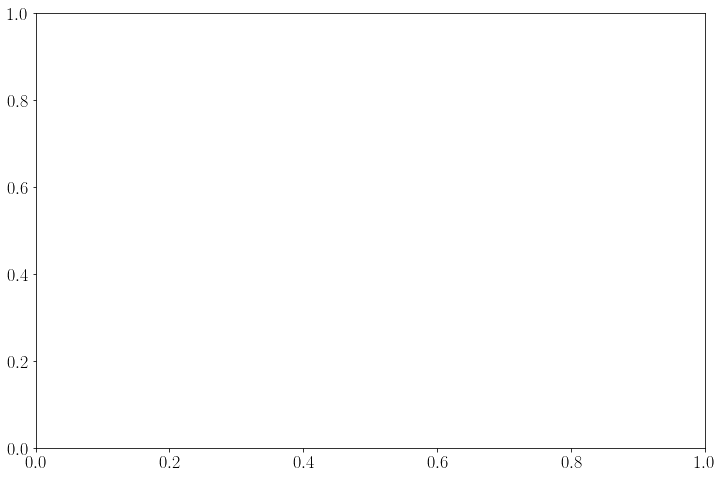

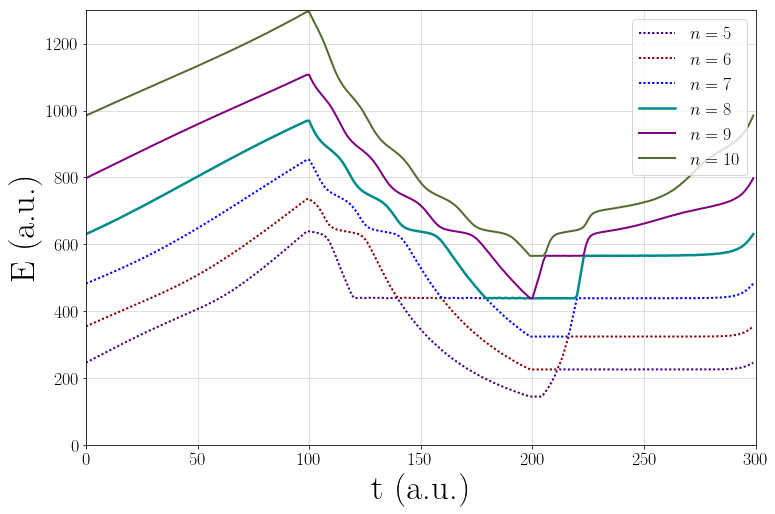

In [14]:
fig, ax = plt.subplots()

rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0,300))
ax.set_ylim((0,1300))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)  

line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
#line01, = ax.plot([], [], lw=2, c='darkblue',ls='-')
#line11, = ax.plot([], [], lw=2, c='g',ls='--')
#line21, = ax.plot([], [], lw=2, c='orange',ls='-.')
#line31, = ax.plot([], [], lw=2.5, c='k',ls=':')
line41, = ax.plot([], [], lw=2, c='indigo',ls=':',label=r'$n=5$')
line51, = ax.plot([], [], lw=2, c='darkred',ls=':',label=r'$n=6$')
line61, = ax.plot([], [], lw=2, c='b',ls=':',label=r'$n=7$')
line71, = ax.plot([], [], lw=2.5, c='darkcyan',ls='-',label=r'$n=8$')
line81, = ax.plot([], [], lw=2, c='purple',ls='-',label=r'$n=9$')
line91, = ax.plot([], [], lw=2, c='darkolivegreen',ls='-',label=r'$n=10$')

tvec2=np.arange(size(Tray2[0,:]))

def init():
    #line01.set_data([], [])
    #line11.set_data([], [])
    #line21.set_data([], [])
    #line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    
    return (line,)
# animation function. This
def plottero():
    '''    
    x01 = tvec1
    y01 = 2*Tray1[0,:]
    line01.set_data(x01, y01)

    
    x11 = tvec1
    y11 = 2*Tray1[1,:]
    line11.set_data(x11, y11)

    
    x21 = tvec1
    y21 = 2*Tray1[2,:]
    line21.set_data(x21, y21)
   
    
    x31 = tvec1
    y31 = 2*Tray1[3,:]
    line31.set_data(x31, y31)

    '''   
    x41 = tvec2
    y41 = 2*Tray2[4,:]
    line41.set_data(x41, y41)
    
    x51 = tvec2
    y51 = 2*Tray2[5,:]
    line51.set_data(x51, y51)
  
    
    x61 = tvec2
    y61 = 2*Tray2[6,:]
    line61.set_data(x61, y61)
    
    x71 = tvec2
    y71 = 2*Tray2[7,:]
    line71.set_data(x71, y71)
    
    
    x81 = tvec2
    y81 = 2*Tray2[8,:]
    line81.set_data(x81, y81)
    
    
    x91 = tvec2
    y91 = 2*Tray2[9,:]
    line91.set_data(x91, y91)
    
    return(line,)
    


plottero()
ylabel("E (a.u.)",size=35)
xlabel("t (a.u.)",size=35)
legend(loc=1)


savefig('EneParraSqQ.png',dpi=1000)

show()

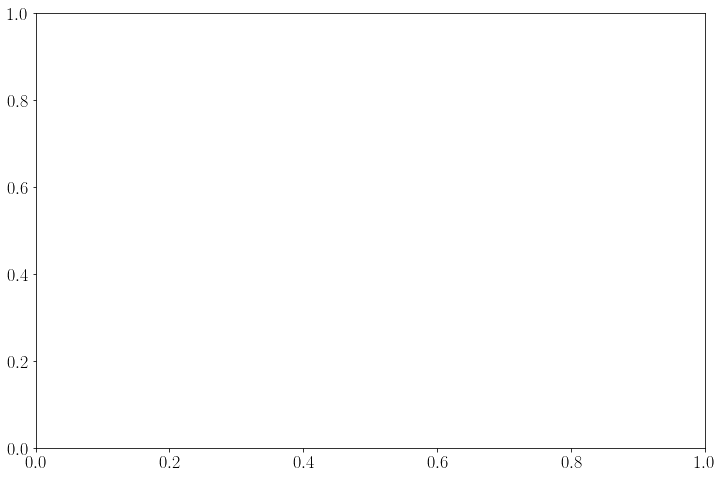

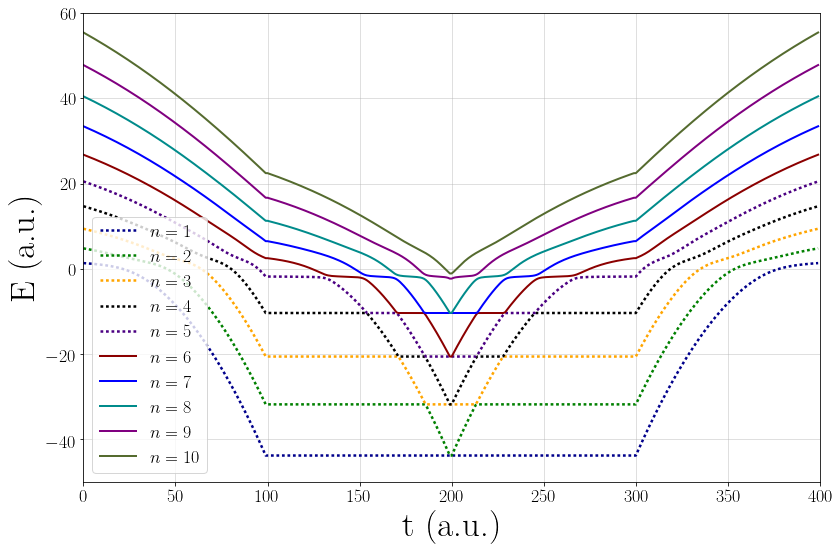

In [15]:
fig, ax = plt.subplots()

rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0,400))
ax.set_ylim((-50,60))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)  

line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2.5, c='darkblue',ls=':',label=r'$n=1$')
line11, = ax.plot([], [], lw=2.5, c='g',ls=':',label=r'$n=2$')
line21, = ax.plot([], [], lw=2.5, c='orange',ls=':',label=r'$n=3$')
line31, = ax.plot([], [], lw=2.5, c='k',ls=':',label=r'$n=4$')
line41, = ax.plot([], [], lw=2.5, c='indigo',ls=':',label=r'$n=5$')
line51, = ax.plot([], [], lw=2, c='darkred',ls='-',label=r'$n=6$')
line61, = ax.plot([], [], lw=2, c='b',ls='-',label=r'$n=7$')
line71, = ax.plot([], [], lw=2, c='darkcyan',ls='-',label=r'$n=8$')
line81, = ax.plot([], [], lw=2, c='purple',ls='-',label=r'$n=9$')
line91, = ax.plot([], [], lw=2, c='darkolivegreen',ls='-',label=r'$n=10$')

tvec3=np.arange(size(Tray3[0,:]))

def init():
    #line01.set_data([], [])
    #line11.set_data([], [])
    #line21.set_data([], [])
    #line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    
    return (line,)
# animation function. This
def plottero():
   
    x01 = tvec3
    y01 = 2*Tray3[0,:]
    line01.set_data(x01, y01)

    
    x11 = tvec3
    y11 = 2*Tray3[1,:]
    line11.set_data(x11, y11)

    
    x21 = tvec3
    y21 = 2*Tray3[2,:]
    line21.set_data(x21, y21)
   
    
    x31 = tvec3
    y31 = 2*Tray3[3,:]
    line31.set_data(x31, y31)

     
    x41 = tvec3
    y41 = 2*Tray3[4,:]
    line41.set_data(x41, y41)
    
    x51 = tvec3
    y51 = 2*Tray3[5,:]
    line51.set_data(x51, y51)
  
    
    x61 = tvec3
    y61 = 2*Tray3[6,:]
    line61.set_data(x61, y61)
    
    x71 = tvec3
    y71 = 2*Tray3[7,:]
    line71.set_data(x71, y71)
    
    
    x81 = tvec3
    y81 = 2*Tray3[8,:]
    line81.set_data(x81, y81)
    
    
    x91 = tvec3
    y91 = 2*Tray3[9,:]
    line91.set_data(x91, y91)
    
    return(line,)
    


plottero()
ylabel("E (a.u.)",size=35)
xlabel("t (a.u.)",size=35)
legend(loc=3)

plt.tight_layout()
savefig('EneJarQ.png',dpi=1000)

show()

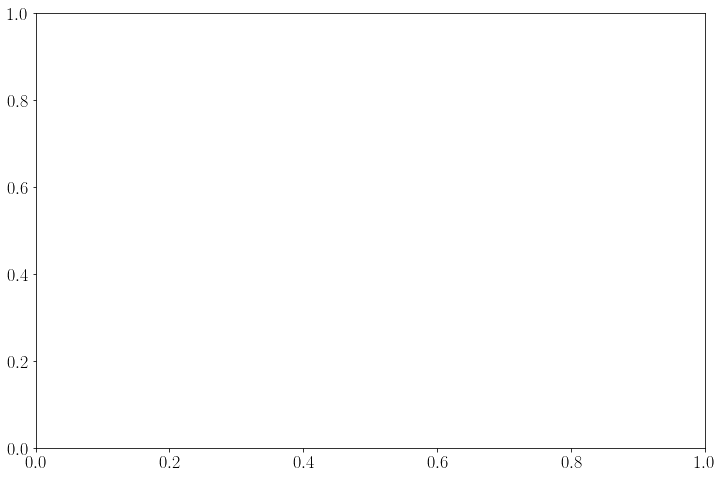

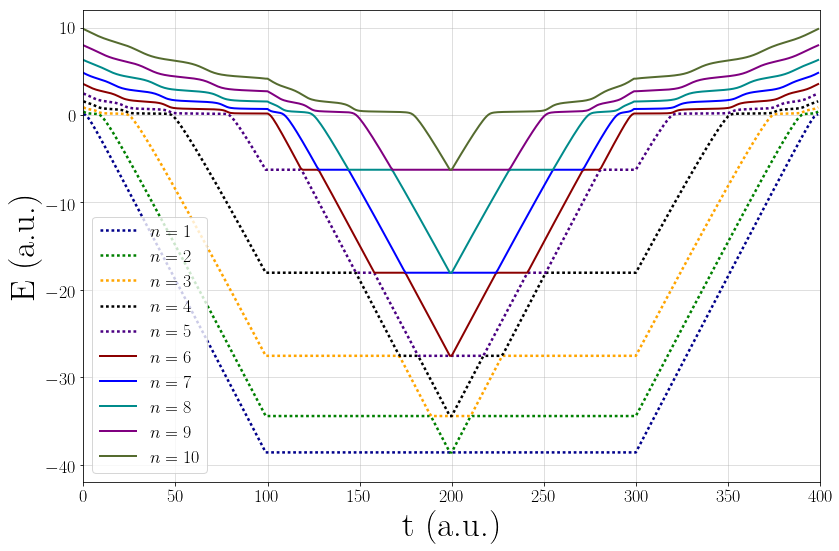

In [16]:
fig, ax = plt.subplots()

rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0,400))
ax.set_ylim((-42,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)  

line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2.5, c='darkblue',ls=':',label=r'$n=1$')
line11, = ax.plot([], [], lw=2.5, c='g',ls=':',label=r'$n=2$')
line21, = ax.plot([], [], lw=2.5, c='orange',ls=':',label=r'$n=3$')
line31, = ax.plot([], [], lw=2.5, c='k',ls=':',label=r'$n=4$')
line41, = ax.plot([], [], lw=2.5, c='indigo',ls=':',label=r'$n=5$')
line51, = ax.plot([], [], lw=2, c='darkred',ls='-',label=r'$n=6$')
line61, = ax.plot([], [], lw=2, c='b',ls='-',label=r'$n=7$')
line71, = ax.plot([], [], lw=2, c='darkcyan',ls='-',label=r'$n=8$')
line81, = ax.plot([], [], lw=2, c='purple',ls='-',label=r'$n=9$')
line91, = ax.plot([], [], lw=2, c='darkolivegreen',ls='-',label=r'$n=10$')

tvec4=np.arange(size(Tray4[0,:]))

def init():
    #line01.set_data([], [])
    #line11.set_data([], [])
    #line21.set_data([], [])
    #line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    
    return (line,)
# animation function. This
def plottero():

    
    x01 = tvec4
    y01 = 2*Tray4[0,:]
    line01.set_data(x01, y01)

    
    x11 = tvec4
    y11 = 2*Tray4[1,:]
    line11.set_data(x11, y11)

    
    x21 = tvec4
    y21 = 2*Tray4[2,:]
    line21.set_data(x21, y21)
   
    
    x31 = tvec4
    y31 = 2*Tray4[3,:]
    line31.set_data(x31, y31)


    x41 = tvec4
    y41 = 2*Tray4[4,:]
    line41.set_data(x41, y41)
    
    x51 = tvec4
    y51 = 2*Tray4[5,:]
    line51.set_data(x51, y51)
  
    
    x61 = tvec4
    y61 = 2*Tray4[6,:]
    line61.set_data(x61, y61)
    
    x71 = tvec4
    y71 = 2*Tray4[7,:]
    line71.set_data(x71, y71)
    
    
    x81 = tvec4
    y81 = 2*Tray4[8,:]
    line81.set_data(x81, y81)
    
    
    x91 = tvec4
    y91 = 2*Tray4[9,:]
    line91.set_data(x91, y91)
    
    return(line,)
    


plottero()
ylabel("E (a.u.)",size=35)
xlabel("t (a.u.)",size=35)
legend(loc=3)

plt.tight_layout()
savefig('EneJarSqQ.png',dpi=1000)

show()

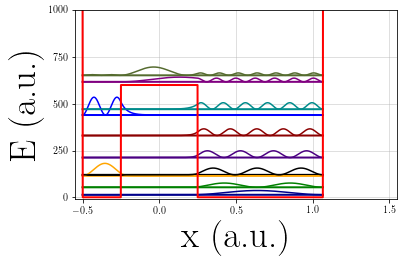

In [17]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-0.55,1.55))
ax.set_ylim((-10,1000))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                


line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue',label='n=1')
line11, = ax.plot([], [], lw=2, c='g',label='n=2')
line21, = ax.plot([], [], lw=2, c='orange',label='n=3')
line31, = ax.plot([], [], lw=2, c='k',label='n=4')
line41, = ax.plot([], [], lw=2, c='indigo',label='n=5')
line51, = ax.plot([], [], lw=2, c='darkred',label='n=6')
line61, = ax.plot([], [], lw=2, c='b',label='n=7')
line71, = ax.plot([], [], lw=2, c='darkcyan',label='n=8')
line81, = ax.plot([], [], lw=2, c='purple',label='n=9')
line91, = ax.plot([], [], lw=2, c='darkolivegreen',label='n=10')


line02, = ax.plot([], [], lw=1.5, c='darkblue')
line12, = ax.plot([], [], lw=1.5, c='g')
line22, = ax.plot([], [], lw=1.5, c='orange')
line32, = ax.plot([], [], lw=1.5, c='k')
line42, = ax.plot([], [], lw=1.5, c='indigo')
line52, = ax.plot([], [], lw=1.5, c='darkred')
line62, = ax.plot([], [], lw=1.5, c='b')
line72, = ax.plot([], [], lw=1.5, c='darkcyan')
line82, = ax.plot([], [], lw=1.5, c='purple')
line92, = ax.plot([], [], lw=1.5, c='darkolivegreen')

line10, = ax.plot([], [], lw=2, c='r')



# initialization function: plot the background of each frame
def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    line02.set_data([], [])
    line12.set_data([], [])
    line22.set_data([], [])
    line32.set_data([], [])
    line42.set_data([], [])
    line52.set_data([], [])
    line62.set_data([], [])
    line72.set_data([], [])
    line82.set_data([], [])
    line92.set_data([], [])
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate(i):
    
    
    
    x01 = TrayX2[:,i]
    y01 = 2*Tray2[0,i]*TrayX2[:,i]/TrayX2[:,i]
    line01.set_data(x01, y01)
    x02 = TrayX2[:,i]
    y02 = TrayPsi2[0,:,i]**2/0.00008+2*Tray2[0,i]
    line02.set_data(x02, y02)
    
    x11 = TrayX2[:,i]
    y11 = 2*Tray2[1,i]*TrayX2[:,i]/TrayX2[:,i]
    line11.set_data(x11, y11)
    x12 = TrayX2[:,i]
    y12 = TrayPsi2[1,:,i]**2/0.00008+2*Tray2[1,i]
    line12.set_data(x12, y12)
    
    x21 = TrayX2[:,i]
    y21 = 2*Tray2[2,i]*TrayX2[:,i]/TrayX2[:,i]
    line21.set_data(x21, y21)
    x22 = TrayX2[:,i]
    y22 = TrayPsi2[2,:,i]**2/0.00008+2*Tray2[2,i]
    line22.set_data(x22, y22)
    
    x31 = TrayX2[:,i]
    y31 = 2*Tray2[3,i]*TrayX2[:,i]/TrayX2[:,i]
    line31.set_data(x31, y31)
    x32 = TrayX2[:,i]
    y32 = TrayPsi2[3,:,i]**2/0.00005+2*Tray2[3,i]
    line32.set_data(x32, y32)
    
    x41 = TrayX2[:,i]
    y41 = 2*Tray2[4,i]*TrayX2[:,i]/TrayX2[:,i]
    line41.set_data(x41, y41)
    x42 = TrayX2[:,i]
    y42 = TrayPsi2[4,:,i]**2/0.00005+2*Tray2[4,i]
    line42.set_data(x42, y42)
    
    x51 = TrayX2[:,i]
    y51 = 2*Tray2[5,i]*TrayX2[:,i]/TrayX2[:,i]
    line51.set_data(x51, y51)
    x52 = TrayX2[:,i]
    y52 = TrayPsi2[5,:,i]**2/0.00005+2*Tray2[5,i]
    line52.set_data(x52, y52)
    
    x61 = TrayX2[:,i]
    y61 = 2*Tray2[6,i]*TrayX2[:,i]/TrayX2[:,i]
    line61.set_data(x61, y61)
    x62 = TrayX2[:,i]
    y62 = TrayPsi2[6,:,i]**2/0.00005+2*Tray2[6,i]
    line62.set_data(x62, y62)
    
    x71 = TrayX2[:,i]
    y71 = 2*Tray2[7,i]*TrayX2[:,i]/TrayX2[:,i]
    line71.set_data(x71, y71)
    x72 = TrayX2[:,i]
    y72 = TrayPsi2[7,:,i]**2/0.00005+2*Tray2[7,i]
    line72.set_data(x72, y72)
    
    x81 = TrayX2[:,i]
    y81 = 2*Tray2[8,i]*TrayX2[:,i]/TrayX2[:,i]
    line81.set_data(x81, y81)
    x82 = TrayX2[:,i]
    y82 = TrayPsi2[8,:,i]**2/0.00005+2*Tray2[8,i]
    line82.set_data(x82, y82)
    
    x91 = TrayX2[:,i]
    y91 = 2*Tray2[9,i]*TrayX2[:,i]/TrayX2[:,i]
    line91.set_data(x91, y91)
    x92 = TrayX2[:,i]
    y92 = TrayPsi2[9,:,i]**2/0.00005+2*Tray2[9,i]
    line92.set_data(x92, y92)
    
    x10 = TrayX2[:,i]
    y10 = 2*TrayV2[:,i]+1000*(np.sign(-TrayX2[:,i]+TrayX2[0,i])+1)+1000*(np.sign(TrayX2[:,i]-TrayX2[-1,i])+1)
    line10.set_data(x10, y10)
    
   
    
    
    return(line,)

animate(175)
ax.set_ylabel("E (a.u.)",size=37)
ax.set_xlabel("x (a.u.)",size=37)
#legend(bbox_to_anchor=(1., 1.02, 1., .102),loc=0)
plt.tight_layout()
savefig('ParrSqDef.png',dpi=1000)

/opt/Anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


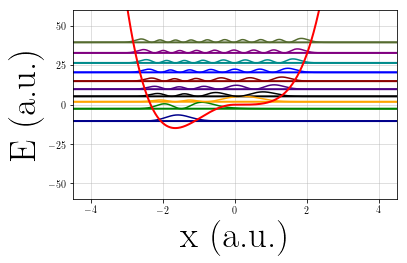

In [18]:
%matplotlib inline


steps=2000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
    # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]



import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-4.5,4.5))
ax.set_ylim((-60,60))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                


line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue')
line11, = ax.plot([], [], lw=2, c='g')
line21, = ax.plot([], [], lw=2, c='orange')
line31, = ax.plot([], [], lw=2, c='k')
line41, = ax.plot([], [], lw=2, c='indigo')
line51, = ax.plot([], [], lw=2, c='darkred')
line61, = ax.plot([], [], lw=2, c='b')
line71, = ax.plot([], [], lw=2, c='darkcyan')
line81, = ax.plot([], [], lw=2, c='purple')
line91, = ax.plot([], [], lw=2, c='darkolivegreen')


line02, = ax.plot([], [], lw=1.5, c='darkblue')
line12, = ax.plot([], [], lw=1.5, c='g')
line22, = ax.plot([], [], lw=1.5, c='orange')
line32, = ax.plot([], [], lw=1.5, c='k')
line42, = ax.plot([], [], lw=1.5, c='indigo')
line52, = ax.plot([], [], lw=1.5, c='darkred')
line62, = ax.plot([], [], lw=1.5, c='b')
line72, = ax.plot([], [], lw=1.5, c='darkcyan')
line82, = ax.plot([], [], lw=1.5, c='purple')
line92, = ax.plot([], [], lw=1.5, c='darkolivegreen')

line10, = ax.plot([], [], lw=2, c='r')

# initialization function: plot the background of each frame
def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    line02.set_data([], [])
    line12.set_data([], [])
    line22.set_data([], [])
    line32.set_data([], [])
    line42.set_data([], [])
    line52.set_data([], [])
    line62.set_data([], [])
    line72.set_data([], [])
    line82.set_data([], [])
    line92.set_data([], [])
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate(i):
    
    x01 = xvec
    y01 = 2*Tray3[0,i]*xvec/xvec
    line01.set_data(x01, y01)
    x02 = xvec
    y02 = TrayPsi3[0,:,i]**2/0.0015+2*Tray3[0,i]
    line02.set_data(x02, y02)
    
    x11 = xvec
    y11 = 2*Tray3[1,i]*xvec/xvec
    line11.set_data(x11, y11)
    x12 = xvec
    y12 = TrayPsi3[1,:,i]**2/0.001+2*Tray3[1,i]
    line12.set_data(x12, y12)
    
    x21 = xvec
    y21 = 2*Tray3[2,i]*xvec/xvec
    line21.set_data(x21, y21)
    x22 = xvec
    y22 = TrayPsi3[2,:,i]**2/0.001+2*Tray3[2,i]
    line22.set_data(x22, y22)
    
    x31 = xvec
    y31 = 2*Tray3[3,i]*xvec/xvec
    line31.set_data(x31, y31)
    x32 = xvec
    y32 = TrayPsi3[3,:,i]**2/0.001+2*Tray3[3,i]
    line32.set_data(x32, y32)
    
    x41 = xvec
    y41 = 2*Tray3[4,i]*xvec/xvec
    line41.set_data(x41, y41)
    x42 = xvec
    y42 = TrayPsi3[4,:,i]**2/0.001+2*Tray3[4,i]
    line42.set_data(x42, y42)
    
    x51 = xvec
    y51 = 2*Tray3[5,i]*xvec/xvec
    line51.set_data(x51, y51)
    x52 = xvec
    y52 = TrayPsi3[5,:,i]**2/0.001+2*Tray3[5,i]
    line52.set_data(x52, y52)
    
    x61 = xvec
    y61 = 2*Tray3[6,i]*xvec/xvec
    line61.set_data(x61, y61)
    x62 = xvec
    y62 = TrayPsi3[6,:,i]**2/0.001+2*Tray3[6,i]
    line62.set_data(x62, y62)
    
    x71 = xvec
    y71 = 2*Tray3[7,i]*xvec/xvec
    line71.set_data(x71, y71)
    x72 = xvec
    y72 = TrayPsi3[7,:,i]**2/0.001+2*Tray3[7,i]
    line72.set_data(x72, y72)
    
    x81 = xvec
    y81 = 2*Tray3[8,i]*xvec/xvec
    line81.set_data(x81, y81)
    x82 = xvec
    y82 = TrayPsi3[8,:,i]**2/0.001+2*Tray3[8,i]
    line82.set_data(x82, y82)
    
    x91 = xvec
    y91 = 2*Tray3[9,i]*xvec/xvec
    line91.set_data(x91, y91)
    x92 = xvec
    y92 = TrayPsi3[9,:,i]**2/0.001+2*Tray3[9,i]
    line92.set_data(x92, y92)
    
    x10 = xvec
    y10 = 2*TrayV3[:,i]
    line10.set_data(x10, y10)
    
  
    return(line,)
# call the animator. blit=True means only re-draw the parts that have changed.
   
    
   

animate(345)
ax.set_ylabel("E (a.u.)",size=37)
ax.set_xlabel("x (a.u.)",size=37)
legend(bbox_to_anchor=(1., 1.02, 1., .102),loc=0)
plt.tight_layout()
savefig('degenerateJar6.png', dpi=1000)

/opt/Anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


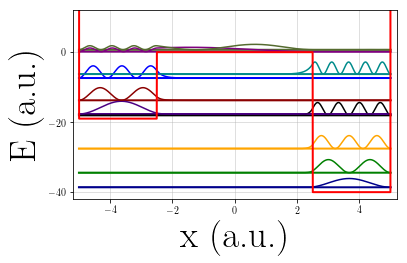

In [19]:
%matplotlib inline




steps=2000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
    # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]




import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-5.2,5.2))
ax.set_ylim((-42,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                


line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue')
line11, = ax.plot([], [], lw=2, c='g')
line21, = ax.plot([], [], lw=2, c='orange')
line31, = ax.plot([], [], lw=2, c='k')
line41, = ax.plot([], [], lw=2, c='indigo')
line51, = ax.plot([], [], lw=2, c='darkred')
line61, = ax.plot([], [], lw=2, c='b')
line71, = ax.plot([], [], lw=2, c='darkcyan')
line81, = ax.plot([], [], lw=2, c='purple')
line91, = ax.plot([], [], lw=2, c='darkolivegreen')


line02, = ax.plot([], [], lw=1.5, c='darkblue')
line12, = ax.plot([], [], lw=1.5, c='g')
line22, = ax.plot([], [], lw=1.5, c='orange')
line32, = ax.plot([], [], lw=1.5, c='k')
line42, = ax.plot([], [], lw=1.5, c='indigo')
line52, = ax.plot([], [], lw=1.5, c='darkred')
line62, = ax.plot([], [], lw=1.5, c='b')
line72, = ax.plot([], [], lw=1.5, c='darkcyan')
line82, = ax.plot([], [], lw=1.5, c='purple')
line92, = ax.plot([], [], lw=1.5, c='darkolivegreen')

line10, = ax.plot([], [], lw=2, c='r')

# initialization function: plot the background of each frame
def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    line02.set_data([], [])
    line12.set_data([], [])
    line22.set_data([], [])
    line32.set_data([], [])
    line42.set_data([], [])
    line52.set_data([], [])
    line62.set_data([], [])
    line72.set_data([], [])
    line82.set_data([], [])
    line92.set_data([], [])
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate(i):
    
    x01 = xvec
    y01 = 2*Tray4[0,i]*xvec/xvec
    line01.set_data(x01, y01)
    x02 = xvec
    y02 = TrayPsi4[0,:,i]**2/0.0015+2*Tray4[0,i]
    line02.set_data(x02, y02)
    
    x11 = xvec
    y11 = 2*Tray4[1,i]*xvec/xvec
    line11.set_data(x11, y11)
    x12 = xvec
    y12 = TrayPsi4[1,:,i]**2/0.001+2*Tray4[1,i]
    line12.set_data(x12, y12)
    
    x21 = xvec
    y21 = 2*Tray4[2,i]*xvec/xvec
    line21.set_data(x21, y21)
    x22 = xvec
    y22 = TrayPsi4[2,:,i]**2/0.001+2*Tray4[2,i]
    line22.set_data(x22, y22)
    
    x31 = xvec
    y31 = 2*Tray4[3,i]*xvec/xvec
    line31.set_data(x31, y31)
    x32 = xvec
    y32 = TrayPsi4[3,:,i]**2/0.001+2*Tray4[3,i]
    line32.set_data(x32, y32)
    
    x41 = xvec
    y41 = 2*Tray4[4,i]*xvec/xvec
    line41.set_data(x41, y41)
    x42 = xvec
    y42 = TrayPsi4[4,:,i]**2/0.001+2*Tray4[4,i]
    line42.set_data(x42, y42)
    
    x51 = xvec
    y51 = 2*Tray4[5,i]*xvec/xvec
    line51.set_data(x51, y51)
    x52 = xvec
    y52 = TrayPsi4[5,:,i]**2/0.001+2*Tray4[5,i]
    line52.set_data(x52, y52)
    
    x61 = xvec
    y61 = 2*Tray4[6,i]*xvec/xvec
    line61.set_data(x61, y61)
    x62 = xvec
    y62 = TrayPsi4[6,:,i]**2/0.001+2*Tray4[6,i]
    line62.set_data(x62, y62)
    
    x71 = xvec
    y71 = 2*Tray4[7,i]*xvec/xvec
    line71.set_data(x71, y71)
    x72 = xvec
    y72 = TrayPsi4[7,:,i]**2/0.001+2*Tray4[7,i]
    line72.set_data(x72, y72)
    
    x81 = xvec
    y81 = 2*Tray4[8,i]*xvec/xvec
    line81.set_data(x81, y81)
    x82 = xvec
    y82 = TrayPsi4[8,:,i]**2/0.001+2*Tray4[8,i]
    line82.set_data(x82, y82)
    
    x91 = xvec
    y91 = 2*Tray4[9,i]*xvec/xvec
    line91.set_data(x91, y91)
    x92 = xvec
    y92 = TrayPsi4[9,:,i]**2/0.001+2*Tray4[9,i]
    line92.set_data(x92, y92)
    
    x10 = xvec
    y10 = 2*TrayV4[:,i]+1000*(np.sign(-xvec+xvec[0])+1)+1000*(np.sign(xvec-xvec[-1])+1)


    line10.set_data(x10, y10)
    
  
    return(line,)
# call the animator. blit=True means only re-draw the parts that have changed.

animate(252)
ax.set_ylabel("E (a.u.)",size=37)
ax.set_xlabel("x (a.u.)",size=37)
legend(bbox_to_anchor=(1., 1.02, 1., .102),loc=0)
plt.tight_layout()
savefig('DoubleSqWellDef.png')

In [20]:
##evolution of the energy levels step 1



%store TrayPsi4
%store Tray4
%store TrayV4
%store TrayX4


%store TrayPsi3
%store Tray3
%store TrayV3
%store TrayX3


%store TrayPsi2
%store Tray2
%store TrayV2
%store TrayX2

%store TrayPsi1
%store Tray1
%store TrayV1
%store TrayX1


Stored 'TrayPsi4' (ndarray)
Stored 'Tray4' (ndarray)
Stored 'TrayV4' (ndarray)
Stored 'TrayX4' (ndarray)
Stored 'TrayPsi3' (ndarray)
Stored 'Tray3' (ndarray)
Stored 'TrayV3' (ndarray)
Stored 'TrayX3' (ndarray)
Stored 'TrayPsi2' (ndarray)
Stored 'Tray2' (ndarray)
Stored 'TrayV2' (ndarray)
Stored 'TrayX2' (ndarray)
Stored 'TrayPsi1' (ndarray)
Stored 'Tray1' (ndarray)
Stored 'TrayV1' (ndarray)
Stored 'TrayX1' (ndarray)


In [21]:
%store -r

In [1]:
%store -r TrayPsi3


In [2]:
%store -r TrayPsi4
%store -r Tray4
%store -r TrayV4
%store -r TrayX4


%store -r TrayPsi3
%store -r Tray3
%store -r TrayV3
%store -r TrayX3


%store -r TrayPsi2
%store -r Tray2
%store -r TrayV2
%store -r TrayX2

%store -r TrayPsi1
%store -r Tray1
%store -r TrayV1
%store -r TrayX1

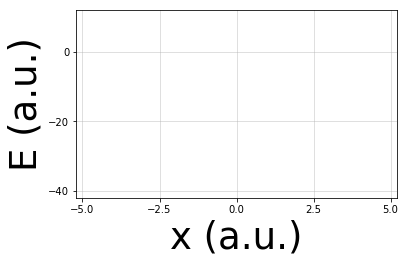

In [16]:
%matplotlib inline




steps=2000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
    # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]




import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-5.2,5.2))
ax.set_ylim((-42,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                
ax.set_ylabel("E (a.u.)",size=37)
ax.set_xlabel("x (a.u.)",size=37)

line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue')
line11, = ax.plot([], [], lw=2, c='g')
line21, = ax.plot([], [], lw=2, c='orange')
line31, = ax.plot([], [], lw=2, c='k')
line41, = ax.plot([], [], lw=2, c='indigo')
line51, = ax.plot([], [], lw=2, c='darkred')
line61, = ax.plot([], [], lw=2, c='b')
line71, = ax.plot([], [], lw=2, c='darkcyan')
line81, = ax.plot([], [], lw=2, c='purple')
line91, = ax.plot([], [], lw=2, c='darkolivegreen')


line02, = ax.plot([], [], lw=1.5, c='darkblue')
line12, = ax.plot([], [], lw=1.5, c='g')
line22, = ax.plot([], [], lw=1.5, c='orange')
line32, = ax.plot([], [], lw=1.5, c='k')
line42, = ax.plot([], [], lw=1.5, c='indigo')
line52, = ax.plot([], [], lw=1.5, c='darkred')
line62, = ax.plot([], [], lw=1.5, c='b')
line72, = ax.plot([], [], lw=1.5, c='darkcyan')
line82, = ax.plot([], [], lw=1.5, c='purple')
line92, = ax.plot([], [], lw=1.5, c='darkolivegreen')

line10, = ax.plot([], [], lw=2, c='r')
plt.tight_layout()
# initialization function: plot the background of each frame
def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    line02.set_data([], [])
    line12.set_data([], [])
    line22.set_data([], [])
    line32.set_data([], [])
    line42.set_data([], [])
    line52.set_data([], [])
    line62.set_data([], [])
    line72.set_data([], [])
    line82.set_data([], [])
    line92.set_data([], [])
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

def animate(i):
    
    x01 = xvec
    y01 = 2*Tray4[0,i]*xvec/xvec
    line01.set_data(x01, y01)
    x02 = xvec
    y02 = TrayPsi4[0,:,i]**2/0.0015+2*Tray4[0,i]
    line02.set_data(x02, y02)
    
    x11 = xvec
    y11 = 2*Tray4[1,i]*xvec/xvec
    line11.set_data(x11, y11)
    x12 = xvec
    y12 = TrayPsi4[1,:,i]**2/0.001+2*Tray4[1,i]
    line12.set_data(x12, y12)
    
    x21 = xvec
    y21 = 2*Tray4[2,i]*xvec/xvec
    line21.set_data(x21, y21)
    x22 = xvec
    y22 = TrayPsi4[2,:,i]**2/0.001+2*Tray4[2,i]
    line22.set_data(x22, y22)
    
    x31 = xvec
    y31 = 2*Tray4[3,i]*xvec/xvec
    line31.set_data(x31, y31)
    x32 = xvec
    y32 = TrayPsi4[3,:,i]**2/0.001+2*Tray4[3,i]
    line32.set_data(x32, y32)
    
    x41 = xvec
    y41 = 2*Tray4[4,i]*xvec/xvec
    line41.set_data(x41, y41)
    x42 = xvec
    y42 = TrayPsi4[4,:,i]**2/0.001+2*Tray4[4,i]
    line42.set_data(x42, y42)
    
    x51 = xvec
    y51 = 2*Tray4[5,i]*xvec/xvec
    line51.set_data(x51, y51)
    x52 = xvec
    y52 = TrayPsi4[5,:,i]**2/0.001+2*Tray4[5,i]
    line52.set_data(x52, y52)
    
    x61 = xvec
    y61 = 2*Tray4[6,i]*xvec/xvec
    line61.set_data(x61, y61)
    x62 = xvec
    y62 = TrayPsi4[6,:,i]**2/0.001+2*Tray4[6,i]
    line62.set_data(x62, y62)
    
    x71 = xvec
    y71 = 2*Tray4[7,i]*xvec/xvec
    line71.set_data(x71, y71)
    x72 = xvec
    y72 = TrayPsi4[7,:,i]**2/0.001+2*Tray4[7,i]
    line72.set_data(x72, y72)
    
    x81 = xvec
    y81 = 2*Tray4[8,i]*xvec/xvec
    line81.set_data(x81, y81)
    x82 = xvec
    y82 = TrayPsi4[8,:,i]**2/0.001+2*Tray4[8,i]
    line82.set_data(x82, y82)
    
    x91 = xvec
    y91 = 2*Tray4[9,i]*xvec/xvec
    line91.set_data(x91, y91)
    x92 = xvec
    y92 = TrayPsi4[9,:,i]**2/0.001+2*Tray4[9,i]
    line92.set_data(x92, y92)
    
    x10 = xvec
    y10 = 2*TrayV4[:,i]+1000*(np.sign(-xvec+xvec[0])+1)+1000*(np.sign(xvec-xvec[-1])+1)


    line10.set_data(x10, y10)
    
  
    return(line,)

# call the animator. blit=True means only re-draw the parts that have changed.


In [17]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0.001, blit=True,repeat_delay=1)
anim.save('Well4.gif', writer='imagemagick', fps=10)
